Found 566 files belonging to 2 classes.
Test edilecek sınıflar: ['bird', 'drone']

Eğitilmiş model 'best_model.keras' diskten yükleniyor...


Model: "V12_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1 (BatchNormalization)        │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2 (BatchNormalization)        │ (None, 64, 64, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3 (BatchNormalization)        │ (None, 32, 32, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_pool                     │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,312 (1.08 MB)

 Trainable params: 93,954 (367.01 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 187,910 (734.03 KB)


>>> Test Seti Üzerinde Final Değerlendirme Başlatılıyor...
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9086 - loss: 0.1945

Test Seti Doğruluğu: 0.9452
Test Seti Kaybı: 0.1573
Karışıklık matrisi oluşturuluyor...
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


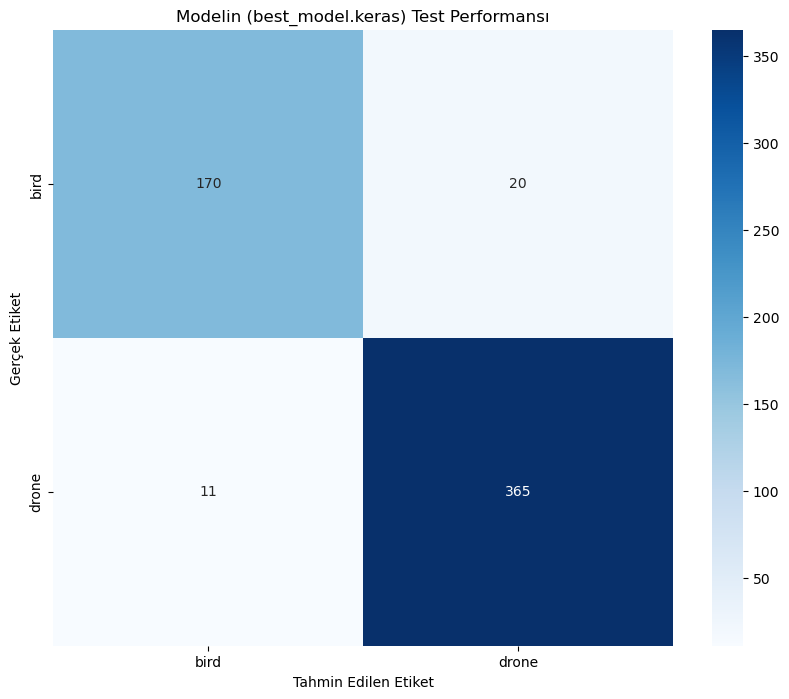


Değerlendirme tamamlandı.


In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os

BASE_PATH = "C:/Users/mkasl/Desktop/donem5/yap470/Ara_rapor_ 1/final_dataset1" #2 sınıflı verinin olduğu dataset yani kuş ve drone var sadece bunun o zamana kadarki en gelişmiş modeli
TEST_PATH = os.path.join(BASE_PATH, 'test')
IMAGE_SIZE = (128, 128) 
BATCH_SIZE = 32
MODEL_PATH = 'best_model.keras' #V12 deneyinde kaydettiğim modelin adı


test_dataset = tf.keras.utils.image_dataset_from_directory( #random olarak almamı sağlıyor fakat eğitimden farkı shuffle false olarak alıyorum iyi testler için
    TEST_PATH, labels='inferred', label_mode='categorical',
    image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, shuffle=False)

class_names = test_dataset.class_names #Sınıf isimlerini karmaşıklık matrisinde kullanmak için alıyorum
test_dataset = test_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE) #optimizasyon için cache ve prefecth eğitim setimde de var

#Modelimi yükleme kısmı
if not os.path.exists(MODEL_PATH):
    print(f"Model bulunamadı. -> '{MODEL_PATH}'")
    exit()
    
model = tf.keras.models.load_model(MODEL_PATH)
model.summary()

#Modelin test seti üzerinde değerlendirilmesi
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"\nTest Seti Doğruluğu: {test_accuracy:.4f}")
print(f"Test Seti Kaybı: {test_loss:.4f}")

# --- 5. Karışıklık Matrisinin Oluşturulması ---
y_pred_probs = model.predict(test_dataset) #Tahminler
y_pred = np.argmax(y_pred_probs, axis=1) 
y_true_labels = np.concatenate([y for x, y in test_dataset], axis=0) #Gerçek etiketler
y_true = np.argmax(y_true_labels, axis=1)
#Karmaşıklık Matrisi 
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Modelin ({os.path.basename(MODEL_PATH)}) Test Performansı')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()
